# Multivariate Parametric Anomaly Detection

This notebook demonstrates how to detect multivariate anomalies using parametric methods.

## Import necessary libraries

In [1]:
from typing import Tuple

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.mixture import GaussianMixture

from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

## Define helper functions

In [2]:
def calculate_mahalanobis_distance(data: np.ndarray) -> np.ndarray:
    """
    Calculate the Mahalanobis distance for each point in the dataset.

    Args:
        data (np.ndarray): The dataset.

    Returns:
        np.ndarray: The Mahalanobis distances.
    """

    # Calculate the mean and covariance of the dataset.
    mean = np.mean(data, axis=0)
    cov_matrix = np.cov(data, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    # Calculate the Mahalanobis distance for each point.
    distances = []
    for i, point in enumerate(data):
        distances.append(mahalanobis(point, mean, inv_cov_matrix))

    return np.array(distances)


def detect_anomalies(
        data: np.ndarray, threshold: float) -> Tuple[np.ndarray, np.ndarray]:
    """
    Detect anomalies in the dataset using the Mahalanobis distance.

    Args:
        data (np.ndarray): The dataset.
        threshold (float): The threshold value.

    Returns:
        Tuple[np.ndarray, np.ndarray]: A tuple containing the anomalies and the
            Mahalanobis distances.
    """

    # Calculate the Mahalanobis distances.
    distances = calculate_mahalanobis_distance(data)

    # Detect anomalies.
    anomalies = distances > threshold
    return anomalies, distances

## Define colors and load dataset

In [3]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#C03B26", # Red
    "#44546A", # Gray
]

# Load the tips dataset.
tips = sns.load_dataset("tips")

# Convert to DataFrame for easier handling.
df = pd.DataFrame({
    "tip": tips["tip"].values,
    "total_bill": tips["total_bill"].values
})
data = df[["tip", "total_bill"]].values

## Mahalanobis Distance Method

In [4]:
# Set the threshold using chi-squared distribution with 2 degrees of freedom
# for a 80% confidence level.
threshold = chi2.ppf(0.80, df=data.shape[1])

# Mahalanobis Distance.
anomalies, distances = detect_anomalies(data, threshold)

## Gaussian Mixture Model

In [5]:
# Gaussian Mixture Model.
gmm = GaussianMixture(n_components=2, covariance_type="full")

# Add the GMM results to the DataFrame.
df["GMM"] = gmm.fit_predict(df)

# Add the anomalies to the DataFrame.
df["Mahalanobis"] = anomalies

## Visualization: Mahalanobis Distance

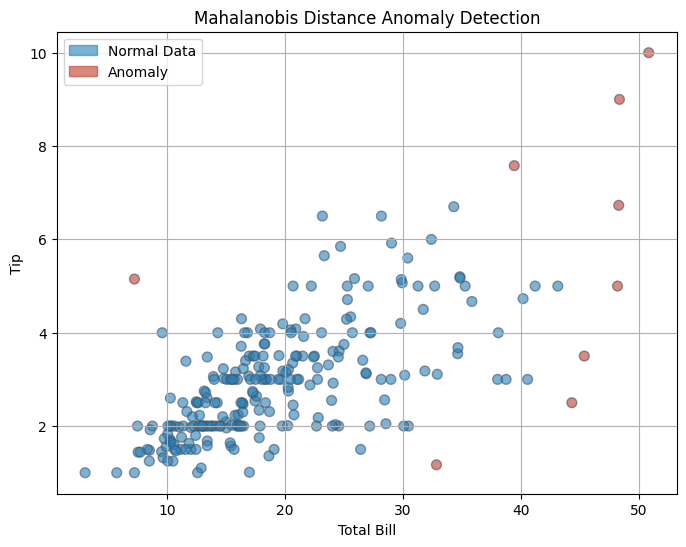

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df["total_bill"], df["tip"],
    c=np.where(df["Mahalanobis"], colors[1], colors[0]),
    s=50, edgecolor=colors[-1], alpha=0.6
)

# Custom legend for clarity.
initial_patch = mpatches.Patch(color=colors[0], alpha=0.6, label="Normal Data")
final_patch = mpatches.Patch(color=colors[1], alpha=0.6, label="Anomaly")
plt.legend(
    handles=[initial_patch, final_patch]
)

plt.title("Mahalanobis Distance Anomaly Detection")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.grid(True)
plt.show()

## Visualization: Gaussian Mixture Model

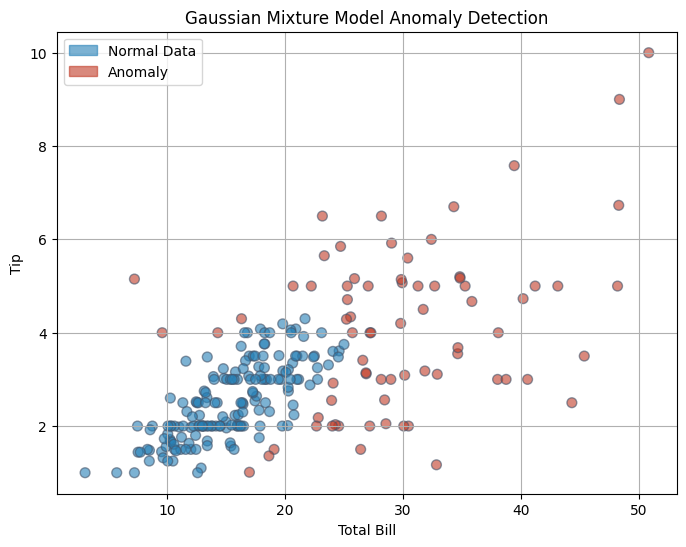

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df["total_bill"], df["tip"],
    c=np.where(df["GMM"], colors[1], colors[0]),
    s=50, edgecolor=colors[-1], alpha=0.6
)

# Custom legend for clarity.
initial_patch = mpatches.Patch(color=colors[0], alpha=0.6, label="Normal Data")
final_patch = mpatches.Patch(color=colors[1], alpha=0.6, label="Anomaly")
plt.legend(
    handles=[initial_patch, final_patch]
)

plt.title("Gaussian Mixture Model Anomaly Detection")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.grid(True)
plt.show()